In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv, os

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint

print(os.getcwd())

c:\Users\joely\Desktop\MyFolders\Projects\ASLRec


In [7]:
#a little data preprocessing

train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test.csv")

y_train = train['label']
y_test = test['label']
del train['label']
del test['label']

# convert to numpy rep for keras
x_train = train.values
x_test = test.values 
y_train = y_train.values
y_test = y_test.values 

# normalization and change to gray scale
x_train = x_train/255
x_test = x_test/255

# reshape 
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print(y_train.shape)
print(y_test.shape)
print(x_train.shape)
print(x_test.shape)


(27455,)
(7172,)
(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [8]:
# find all unique labels: data for 9(J) and 25(Z) are missing
labels = np.array(np.unique(y_test))
numLabels = 24
print(labels)

# one hot encode the labels 
# for train set
ohe_labels_train = np.zeros((len(y_train), numLabels))
for i in range (len(y_train)):
    ohe_labels_train[i] = np.where(labels == y_train[i], 1, 0)

# for test set
ohe_labels_test = np.zeros((len(y_test), numLabels))
for i in range (len(y_test)):
    ohe_labels_test[i] = np.where(labels == y_test[i], 1, 0)



[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


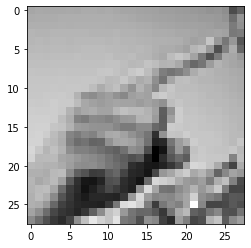

In [9]:
#plot an image 
plt.imshow(x_train[1], cmap = 'gray')

In [33]:
# convolutional model
img_rows = 28
img_cols = 28

model = Sequential()
model.add(Conv2D(filters=25, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), padding = 'same'))
model.add(Conv2D(filters=25, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), padding = 'same'))
model.add(Conv2D(filters=25, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), padding = 'same'))
model.add(Conv2D(filters=24, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(24, activation='softmax'))


# compile model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 28, 28, 25)        250       
                                                                 
 batch_normalization_48 (Bat  (None, 28, 28, 25)       100       
 chNormalization)                                                
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 14, 14, 25)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 14, 14, 25)        5650      
                                                                 
 batch_normalization_49 (Bat  (None, 14, 14, 25)       100       
 chNormalization)                                                
                                                     

In [34]:
#train the model and save optimal parameters
checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss', save_best_only='True')
callbacks_list = [checkpoint]

training = model.fit(x_train, ohe_labels_train, validation_split=0.2, epochs=10,callbacks=callbacks_list)

Epoch 1/10
687/687 [==============================] - 25s 35ms/step - loss: 0.5826 - accuracy: 0.8483 - val_loss: 0.3094 - val_accuracy: 0.9151
Epoch 2/10
687/687 [==============================] - 24s 35ms/step - loss: 0.0162 - accuracy: 0.9996 - val_loss: 0.0165 - val_accuracy: 0.9985
Epoch 3/10
687/687 [==============================] - 24s 35ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 4/10
687/687 [==============================] - 24s 35ms/step - loss: 0.0365 - accuracy: 0.9900 - val_loss: 0.1251 - val_accuracy: 0.9559
Epoch 5/10
687/687 [==============================] - 24s 35ms/step - loss: 0.0086 - accuracy: 0.9984 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 6/10
687/687 [==============================] - 24s 35ms/step - loss: 7.7224e-04 - accuracy: 1.0000 - val_loss: 5.6254e-04 - val_accuracy: 1.0000
Epoch 7/10
687/687 [==============================] - 24s 35ms/step - loss: 4.3663e-04 - accuracy: 1.0000 - val_loss: 3.8935e-04

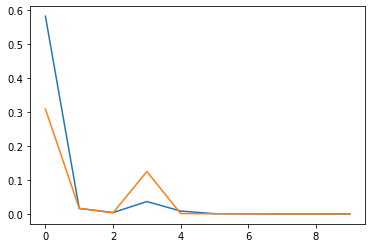

In [35]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.show()

In [38]:
score = model.evaluate(x=x_test, y=ohe_labels_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9276352524757385
